In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import adjusted_rand_score
from matplotlib.ticker import FuncFormatter

In [88]:
#df = pd.read_csv("C:\\Users\\stoer\\OneDrive\\Desktop\\Machine Learning\\iris\\iris.data")
#df.to_csv('irisdata.csv', index=False)

In [89]:
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv('irisdata.csv', names=column_names, header=None)

In [90]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [93]:
#Encoding  class
class_encoding = {
    "Iris-setosa": 0, 
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}

df['class'] = df['class'].map(class_encoding)

In [94]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

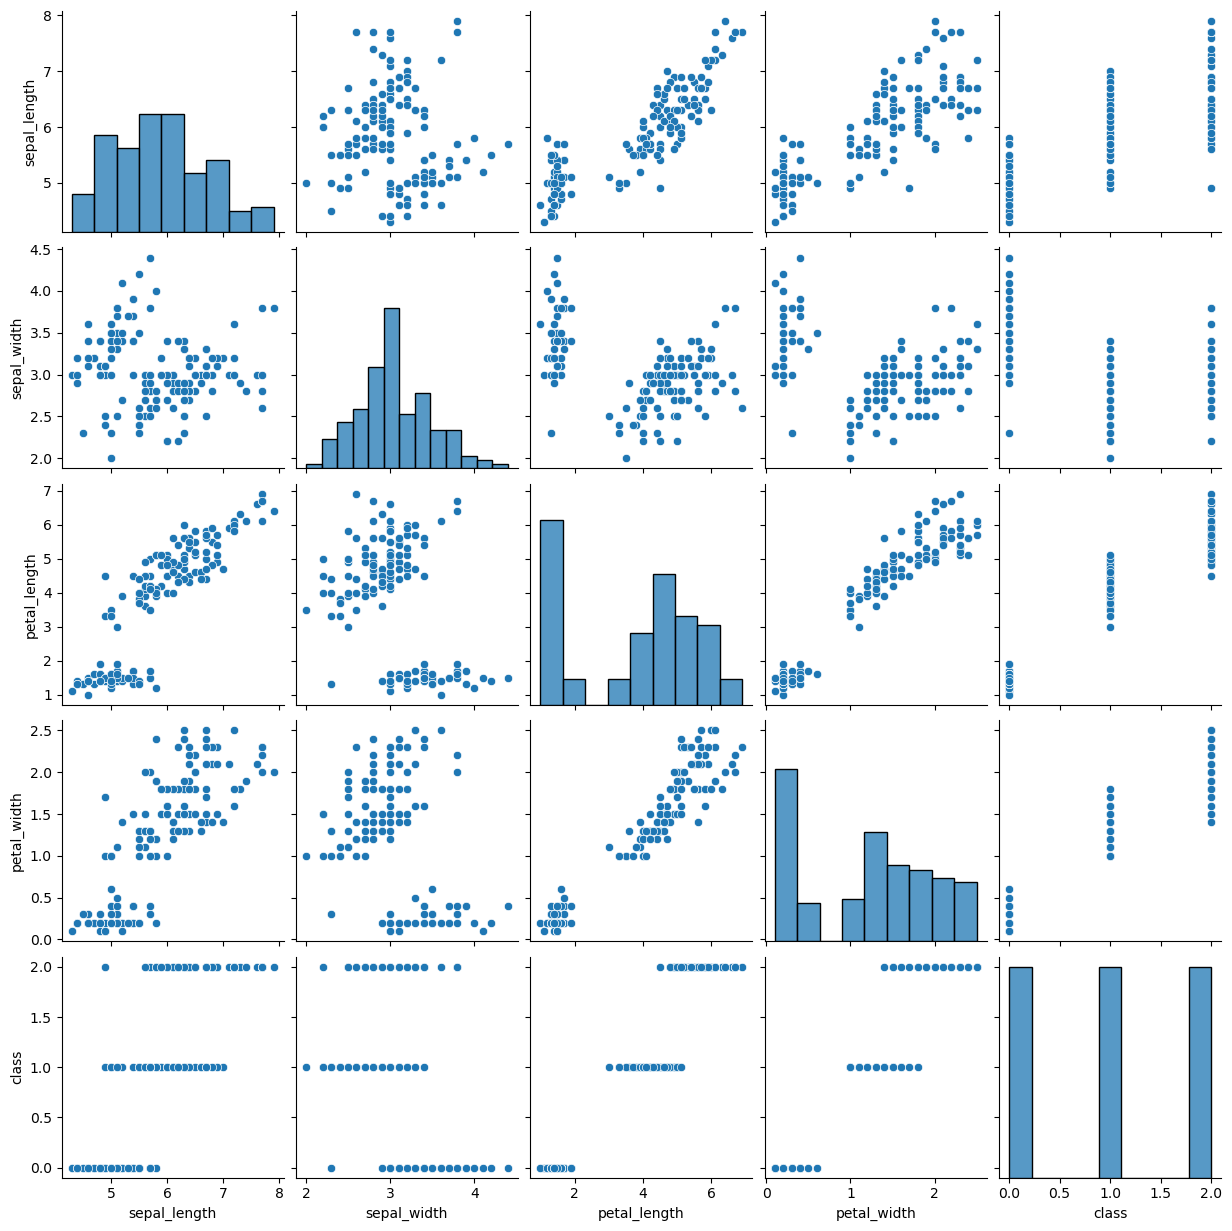

In [95]:
sns.pairplot(data = df)

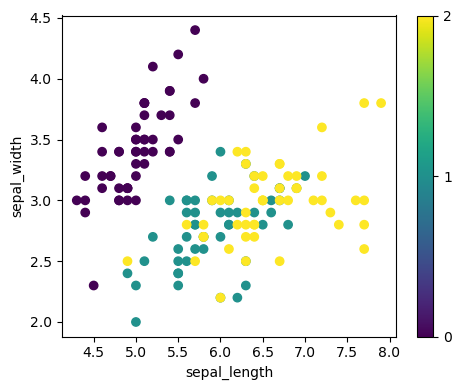

In [96]:
plt.figure(figsize=(5, 4))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['class'])

#formatter = FuncFormatter(lambda i, _: df['class'][i])
formatter = FuncFormatter(lambda i, _: str(i))
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(column_names[0])
plt.ylabel(column_names[1])

plt.tight_layout()
plt.show()

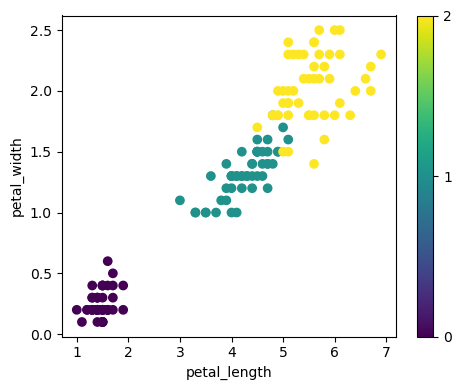

In [97]:
plt.figure(figsize=(5, 4))
plt.scatter(df['petal_length'], df['petal_width'], c=df['class'])

#formatter = FuncFormatter(lambda i, _: df['class'][i])
formatter = FuncFormatter(lambda i, _: str(i))
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel(column_names[2])
plt.ylabel(column_names[3])

plt.tight_layout()
plt.show()

<Axes: >

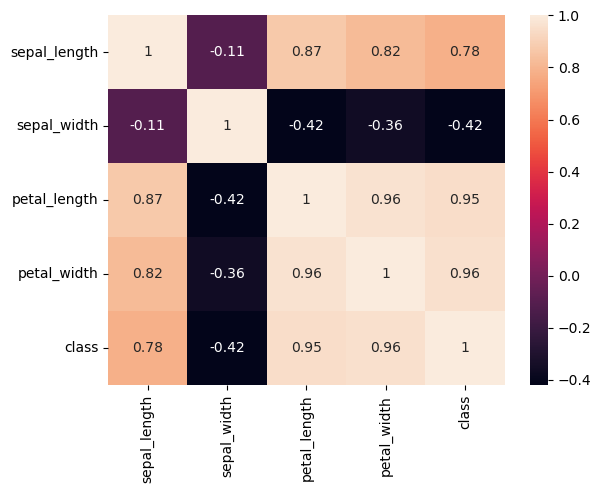

In [98]:
sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Petal Width vs. Class')

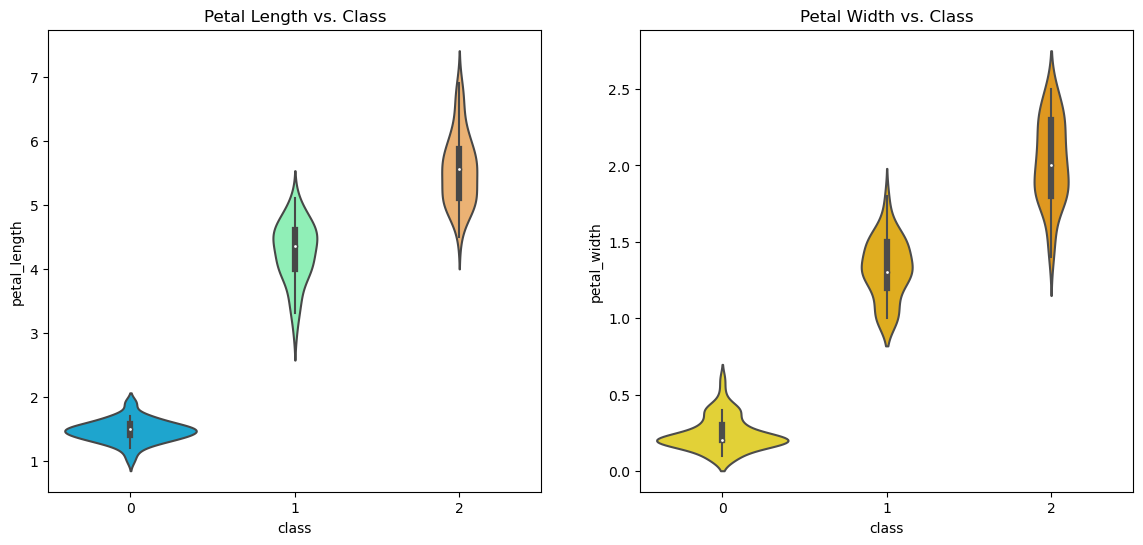

In [99]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='class', y='petal_length',data=df, palette='rainbow',ax=ax)
ax.set_title('Petal Length vs. Class')
ax = f.add_subplot(122)
sns.violinplot(x='class', y='petal_width',data=df, palette='Wistia',ax=ax)
ax.set_title('Petal Width vs. Class')

Text(0.5, 1.0, 'Sepal Width vs. Class')

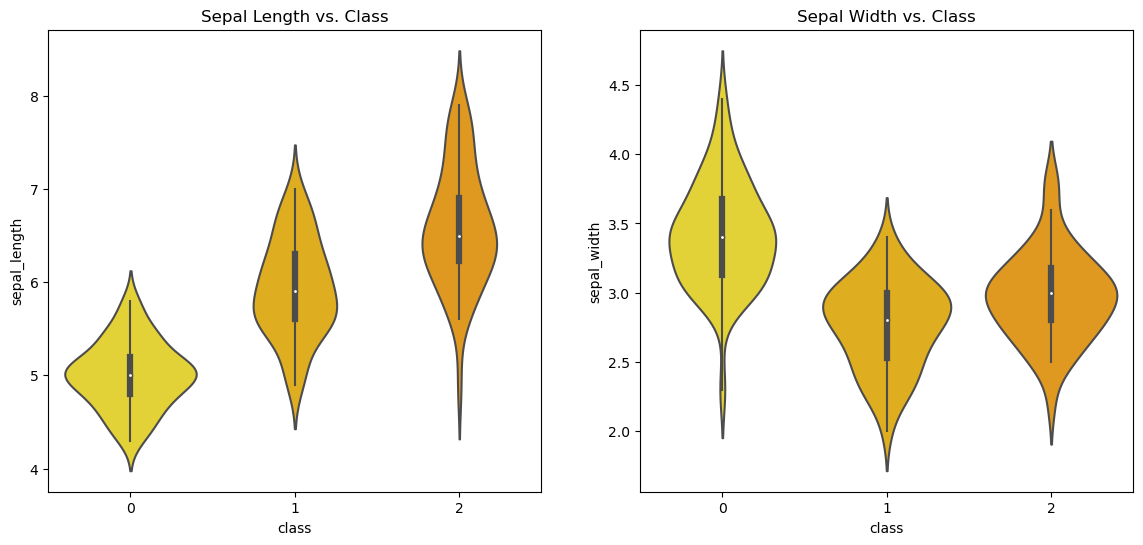

In [100]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='class', y= 'sepal_length',data=df, palette='Wistia',ax=ax)
ax.set_title('Sepal Length vs. Class')
ax = f.add_subplot(122)
sns.violinplot(x='class', y= 'sepal_width',data=df, palette='Wistia',ax=ax)
ax.set_title('Sepal Width vs. Class')

In [101]:
wholedf = df.drop('class', axis=1)

In [102]:
wholedf.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [103]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(wholedf)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.580184463257396


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.4589717867018717


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.3904820205538904


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.3452761026290405


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.32640048632156665


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.32703225233732597


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.34437349579557414


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.351001629438629


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.3483213408864833
Optimal K: 2


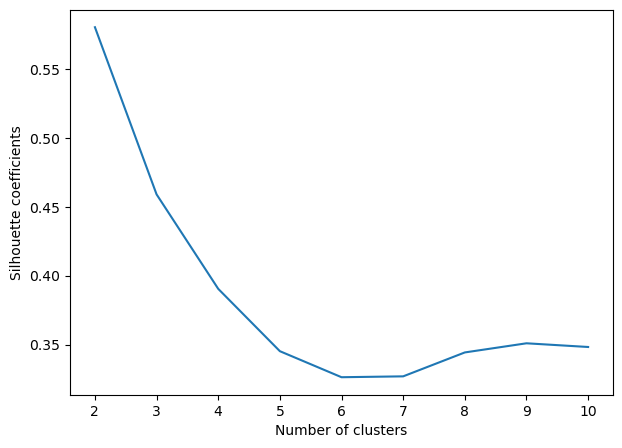

In [104]:
silhouette_avgs = []
min_k = 2
max_k = 10  # Set your maximum value of k

for k in range(min_k, max_k + 1):  # Adjust the loop range
    kmeans_model = KMeans(n_clusters=k).fit(df_scaled)
    score = metrics.silhouette_score(df_scaled, kmeans_model.labels_)
    print('Silhouette Coefficients for k =', k, "is", score)
    silhouette_avgs.append(score)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, max_k + 1), silhouette_avgs)  # Adjust the x-axis range

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")

optimal_k = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K:", optimal_k)


In [105]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_scaled)

x_t= pca.fit_transform(df_scaled)[:, 0]
y_t= pca.fit_transform(df_scaled)[:, 1]


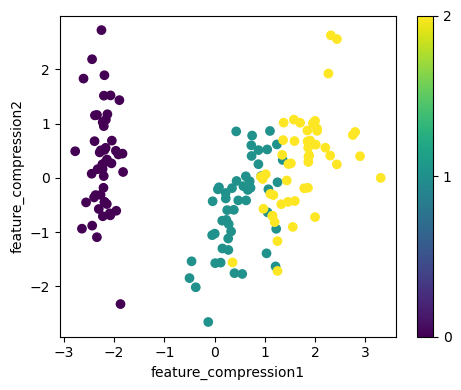

In [106]:
plt.figure(figsize=(5, 4))
plt.scatter(x=x_t, y=y_t, c=df['class'])

#formatter = FuncFormatter(lambda i, _: df['class'][i])
formatter = FuncFormatter(lambda i, _: str(i))
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.xlabel('feature_compression1')
plt.ylabel('feature_compression2')

plt.tight_layout()
plt.show()

In [107]:
kmeans_model = KMeans(n_clusters=3, random_state=15).fit(df_scaled)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

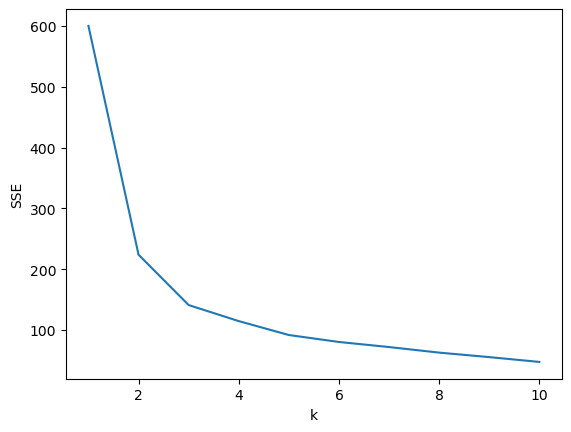

In [108]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df_scaled)
    sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)

In [109]:
score = metrics.silhouette_score(df_scaled, kmeans_model.labels_)
print(score)

0.4589717867018717


In [110]:
true_labels = df['class']

ari = adjusted_rand_score(true_labels, kmeans_model.labels_)
print(ari)

0.6201351808870379


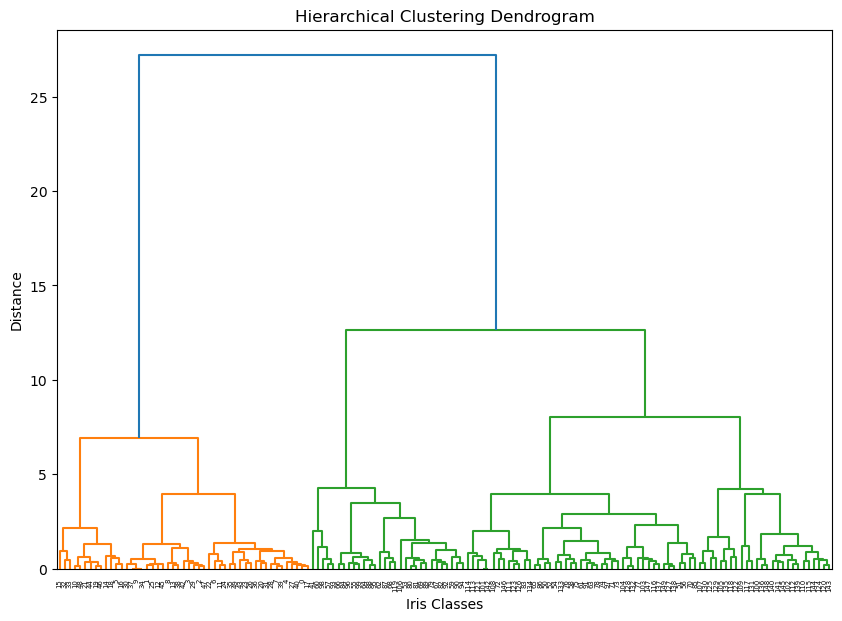

In [111]:
# Perform hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Classes')
plt.ylabel('Distance')
plt.show()

In [112]:
# Assuming 'df' is your original DataFrame
selected_features = ['petal_length', 'petal_width', 'sepal_width', 'sepal_length']

# Select the features you want to include in your new DataFrame
X = df[selected_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
X_scaled = scaler.fit_transform(X)

# Apply PCA to the 'petal_length' and 'petal_width' features
pca = PCA(n_components=1)
pca.fit(X_scaled[:, :2])  # Select the first two columns for PCA

# Transform the selected features using PCA
X_pca = pca.transform(X_scaled[:, :2])  # Transform only the 'petal_length' and 'petal_width' columns

# Create a new DataFrame combining the scaled features
new_df = pd.DataFrame({'X_scaled': X_pca.flatten(),
                        'sepal_width_scaled': X_scaled[:, 2],  # 'sepal_width'
                        'sepal_length_scaled': X_scaled[:, 3]})  # 'sepal_length'

In [113]:
kmeans_model_pca = KMeans(n_clusters=3, random_state=15).fit(new_df)

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


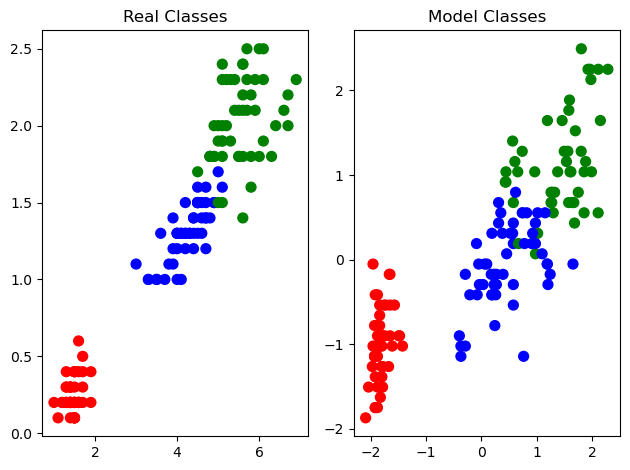

In [114]:
# Define the color mapping for classes
color_theme = {
    0: 'red',
    1: 'blue',
    2: 'green',
}

# Get unique class labels from the K-Means clustering
class_labels = kmeans_model_pca.labels_

# Create a scatter plot for real classes
plt.subplot(1, 2, 1)
plt.scatter(x=df['petal_length'], y=df['petal_width'], c=[color_theme[label] for label in df['class']], s=50)
plt.title('Real Classes')

# Create a scatter plot for model classes using PCA-transformed data
plt.subplot(1, 2, 2)
plt.scatter(x=X_pca, y=X_scaled[:, 3], c=[color_theme[label] for label in class_labels], s=50)
plt.title('Model Classes')

plt.tight_layout()
plt.show()

In [115]:
score = metrics.silhouette_score(new_df, kmeans_model_pca.labels_)
print(score)

0.4680731645222446


In [116]:
true_labels = df['class']

ari = adjusted_rand_score(true_labels, kmeans_model_pca.labels_)
print(ari)

0.6100728505285608


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.5866897943460704


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.4680731645222446


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.39730285125520265


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.36116493628221086


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.3372663005745365


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.33438263195614826


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.3426300381969447


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.3518050329892869


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.3788922732170036
Optimal K: 2


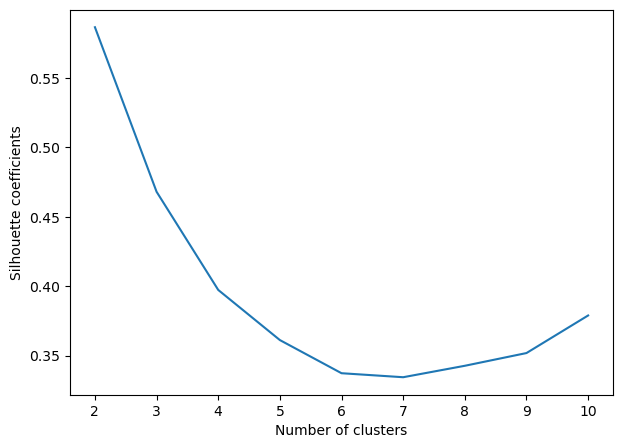

In [128]:
silhouette_avgs = []
min_k = 2
max_k = 10  # Set your maximum value of k

for k in range(min_k, max_k + 1):  # Adjust the loop range
    kmeans_model = KMeans(n_clusters=k).fit(new_df)
    score = metrics.silhouette_score(new_df, kmeans_model.labels_)
    print('Silhouette Coefficients for k =', k, "is", score)
    silhouette_avgs.append(score)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, max_k + 1), silhouette_avgs)  # Adjust the x-axis range

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")

optimal_k = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K:", optimal_k)


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

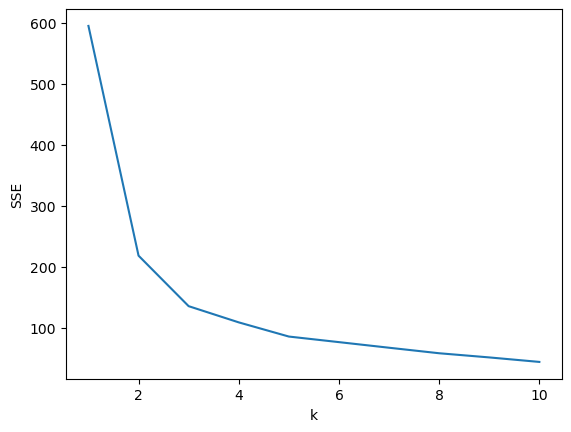

In [117]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(new_df)
    sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)

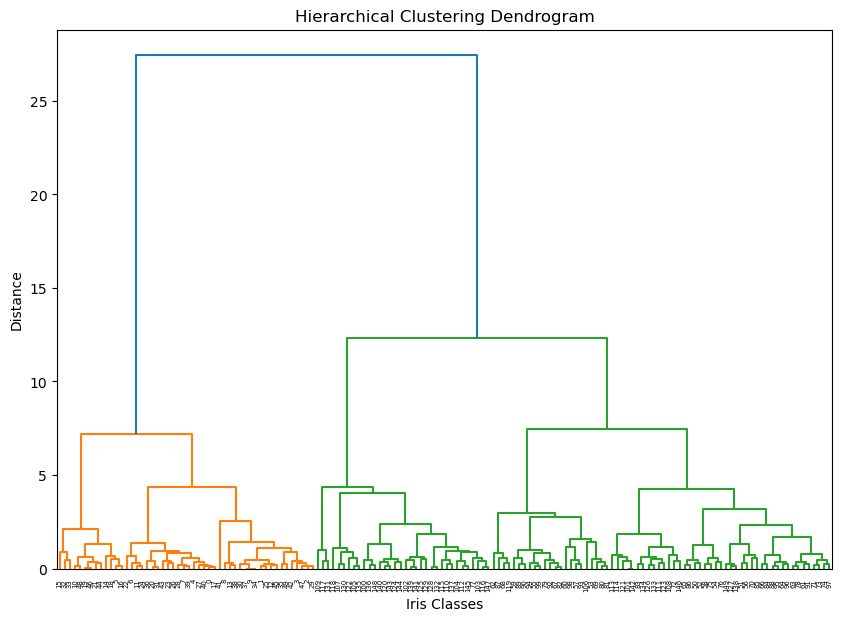

In [129]:
# Perform hierarchical clustering
linkage_matrix = linkage(new_df, method='ward')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Classes')
plt.ylabel('Distance')
plt.show()

In [118]:
model1_df=df.iloc[:,[0, 1]]
model2_df=df.iloc[:,[2, 3]]

In [119]:
model2_df

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [120]:
scaler = StandardScaler()
scaler.fit(model1_df)

StandardScaler()

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.4635854719215507


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.4434693231245126


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.4226026685130098


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.41512382232807116


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.4049493001929806


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.3966937676323973


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.384214385993153


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.4093352650061504


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.3807222535015402
Optimal K: 2


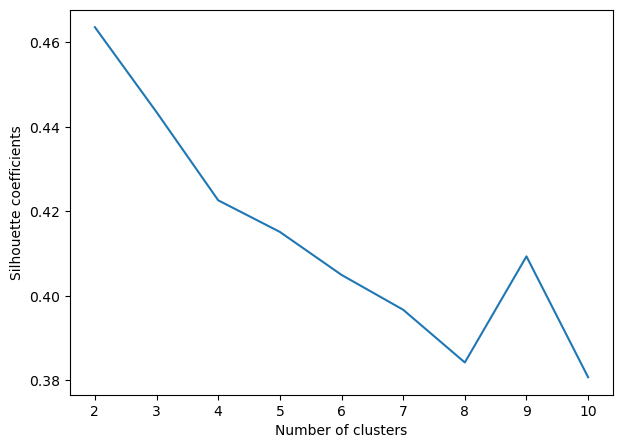

In [121]:
silhouette_avgs = []
min_k = 2
max_k = 10  # Set your maximum value of k

for k in range(min_k, max_k + 1):  # Adjust the loop range
    kmeans_model = KMeans(n_clusters=k).fit(model1_df)
    score = metrics.silhouette_score(model1_df, kmeans_model.labels_)
    print('Silhouette Coefficients for k =', k, "is", score)
    silhouette_avgs.append(score)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, max_k + 1), silhouette_avgs)  # Adjust the x-axis range

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")

optimal_k = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K:", optimal_k)


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

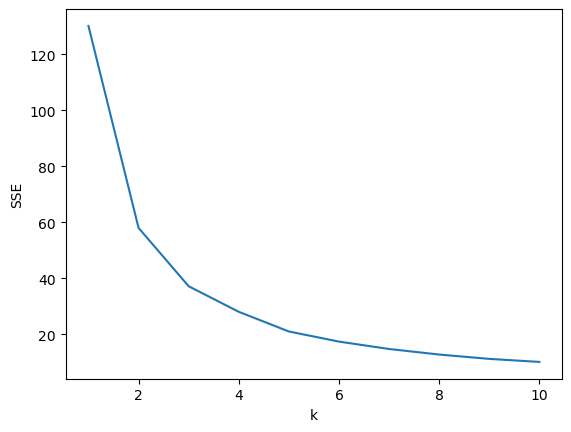

In [122]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(model1_df)
    sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)

In [123]:
true_labels = df['class']

ari = adjusted_rand_score(true_labels, kmeans_model.labels_)
print(ari)

0.24961831435154438


In [124]:
scaler = StandardScaler()
scaler.fit(model2_df)

StandardScaler()

c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 2 is 0.7651755502866581


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 3 is 0.6602760882193361


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 4 is 0.6109733784633249


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 5 is 0.5881403468025436


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 6 is 0.5742586971597542


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 7 is 0.5718278633457362


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 8 is 0.5605443207362267


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 9 is 0.586206554068538


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Coefficients for k = 10 is 0.4317334886985991
Optimal K: 2


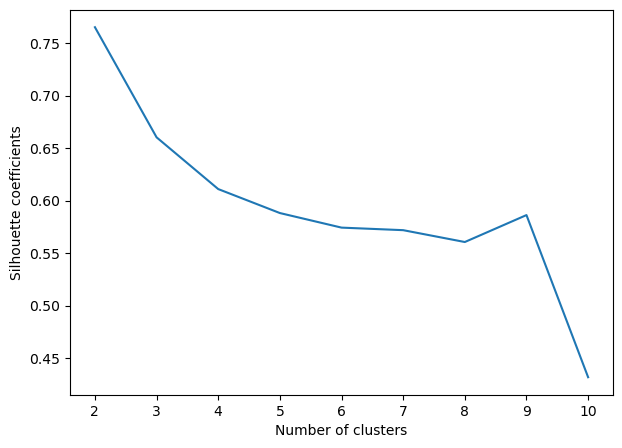

In [125]:
silhouette_avgs = []
min_k = 2
max_k = 10  # Set your maximum value of k

for k in range(min_k, max_k + 1):  # Adjust the loop range
    kmeans_model = KMeans(n_clusters=k).fit(model2_df)
    score = metrics.silhouette_score(model2_df, kmeans_model.labels_)
    print('Silhouette Coefficients for k =', k, "is", score)
    silhouette_avgs.append(score)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, max_k + 1), silhouette_avgs)  # Adjust the x-axis range

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficients")

optimal_k = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K:", optimal_k)

In [126]:
true_labels = df['class']

ari = adjusted_rand_score(true_labels, kmeans_model.labels_)
print(ari)

0.41432466765379355


c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\stoer\anaconda3\envs\Machine_learning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

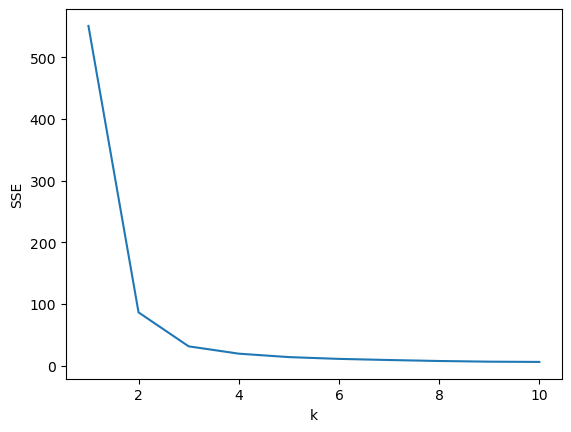

In [127]:
k_rng = range(1, 11)
sse = []

for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(model2_df)
    sse.append(km.inertia_)

plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(k_rng, sse)